### Create the Decision Tree classifier and visualize it graphically.

Done by divya maniya.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv",index_col='Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.isnull().sum()   # Check for Null values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016CF2EF65E0>,
      dtype=object)

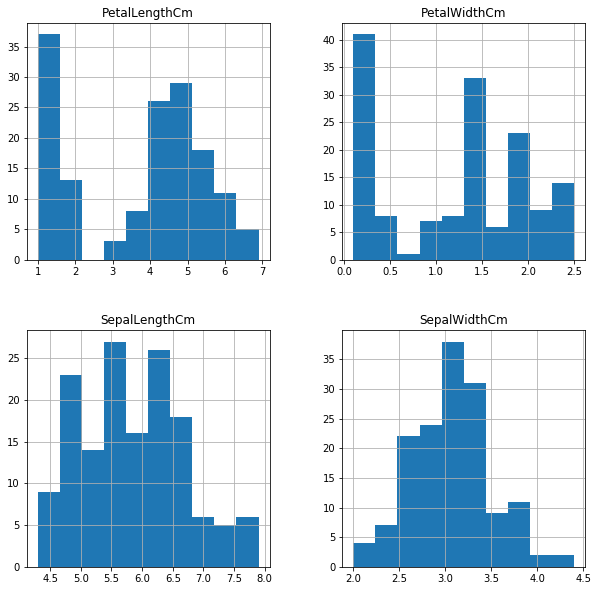

In [6]:
df.hist(figsize=(10,10))

In [7]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
# Model Development
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [9]:
inputs = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values
classes = df['Species'].values

In [10]:
# Data Preprocessing
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(classes)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(inputs,classes, train_size=0.70, random_state=1)

In [12]:
Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [13]:
Prediction = Decision_Tree.predict(x_test)

In [15]:
# Model Evalution 
from sklearn.metrics import classification_report
print(classification_report(y_test, Prediction, target_names = ['type-0','type-1','type-2']))

              precision    recall  f1-score   support

      type-0       1.00      1.00      1.00        14
      type-1       0.94      0.94      0.94        18
      type-2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [16]:
from sklearn.model_selection import cross_val_score
accuracy_scores = cross_val_score(Decision_Tree,inputs,y, cv=3)
accuracy_scores

array([0.98, 0.94, 1.  ])

In [17]:
accuracy_scores.mean()

0.9733333333333333

In [18]:
import sklearn
from sklearn.tree import plot_tree
print(sklearn.__version__)

0.23.1


Text(0.5, 1.0, 'The Tree created by Decision Tree')

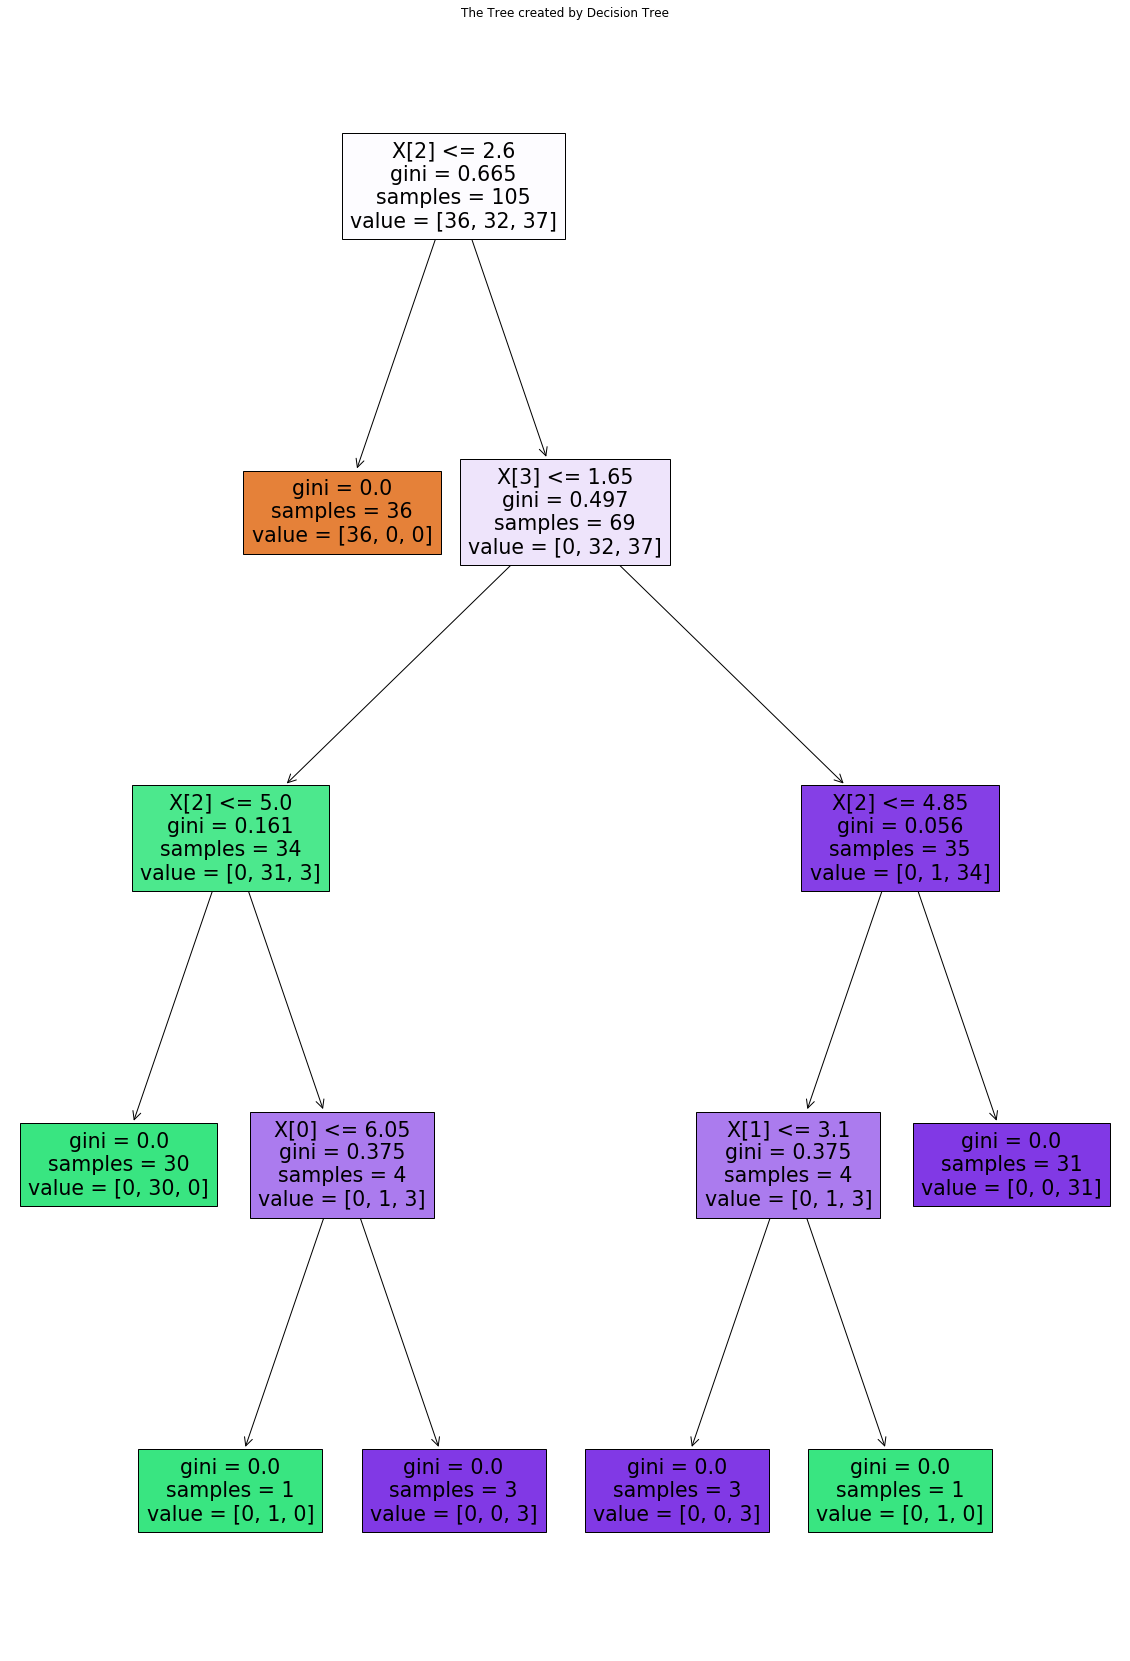

In [19]:
plt.rcParams["figure.figsize"] = 20,30

plot_tree(Decision_Tree,filled=True)
plt.title("The Tree created by Decision Tree")